In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scikits.odes.ode import ode
import time
import seaborn as sns

from scipy.optimize import minimize
from scipy.optimize import Bounds
import time

In [2]:
#Import local functions
sys.path.append('../functions')
from functions import nonlinearity, repression, activation

In [3]:
loss_landscape = np.array([[0.49982626, 0.49792845, 0.49756218, 0.49734383, 0.49718929,
        0.49707048, 0.49697451, 0.49689438, 0.49682586, 0.49676619],
       [0.50472232, 0.32680613, 0.27982113, 0.25138128, 0.2319507 ,
        0.21768476, 0.20654281, 0.19746624, 0.1898588 , 0.18335086],
       [0.50759866, 0.28697823, 0.24235829, 0.21998151, 0.20591785,
        0.19616598, 0.18900803, 0.1835559 , 0.17929539, 0.17590476],
       [0.50965513, 0.28773325, 0.25168418, 0.23543074, 0.22636415,
        0.22083476, 0.21733127, 0.21510246, 0.21372941, 0.2129591 ],
       [0.51130077, 0.30471991, 0.27690793, 0.2663641 , 0.26166813,
        0.25968926, 0.2591943 , 0.25959635, 0.26058035, 0.26196225],
       [0.51269279, 0.32853909, 0.30846297, 0.30289877, 0.30189551,
        0.30289513, 0.30494061, 0.30759544, 0.31063355, 0.31392689],
       [0.5139101 , 0.35532979, 0.34224085, 0.34096487, 0.34311812,
        0.34669053, 0.35096952, 0.35564406, 0.36055895, 0.36562908],
       [0.51499854, 0.38318515, 0.3763131 , 0.37875149, 0.38365561,
        0.38950856, 0.39580506, 0.40233598, 0.40900184, 0.41575038],
       [0.51598736, 0.41111088, 0.40975359, 0.41544414, 0.42278658,
        0.43069678, 0.43884322, 0.44709955, 0.45541043, 0.46374924],
       [0.51689646, 0.438583  , 0.44212984, 0.45069969, 0.46023189,
        0.47001895, 0.47987542, 0.48974285, 0.49960154, 0.50944532]])

k1s_landscape = np.array([[1.000e-07, 1.112e-04, 2.223e-04, 3.334e-04, 4.445e-04, 5.556e-04,
        6.667e-04, 7.778e-04, 8.889e-04, 1.000e-03],
       [1.000e-07, 1.112e-04, 2.223e-04, 3.334e-04, 4.445e-04, 5.556e-04,
        6.667e-04, 7.778e-04, 8.889e-04, 1.000e-03],
       [1.000e-07, 1.112e-04, 2.223e-04, 3.334e-04, 4.445e-04, 5.556e-04,
        6.667e-04, 7.778e-04, 8.889e-04, 1.000e-03],
       [1.000e-07, 1.112e-04, 2.223e-04, 3.334e-04, 4.445e-04, 5.556e-04,
        6.667e-04, 7.778e-04, 8.889e-04, 1.000e-03],
       [1.000e-07, 1.112e-04, 2.223e-04, 3.334e-04, 4.445e-04, 5.556e-04,
        6.667e-04, 7.778e-04, 8.889e-04, 1.000e-03],
       [1.000e-07, 1.112e-04, 2.223e-04, 3.334e-04, 4.445e-04, 5.556e-04,
        6.667e-04, 7.778e-04, 8.889e-04, 1.000e-03],
       [1.000e-07, 1.112e-04, 2.223e-04, 3.334e-04, 4.445e-04, 5.556e-04,
        6.667e-04, 7.778e-04, 8.889e-04, 1.000e-03],
       [1.000e-07, 1.112e-04, 2.223e-04, 3.334e-04, 4.445e-04, 5.556e-04,
        6.667e-04, 7.778e-04, 8.889e-04, 1.000e-03],
       [1.000e-07, 1.112e-04, 2.223e-04, 3.334e-04, 4.445e-04, 5.556e-04,
        6.667e-04, 7.778e-04, 8.889e-04, 1.000e-03],
       [1.000e-07, 1.112e-04, 2.223e-04, 3.334e-04, 4.445e-04, 5.556e-04,
        6.667e-04, 7.778e-04, 8.889e-04, 1.000e-03]])

k2s_landscape = np.array([[1.000e-07, 1.000e-07, 1.000e-07, 1.000e-07, 1.000e-07, 1.000e-07,
        1.000e-07, 1.000e-07, 1.000e-07, 1.000e-07],
       [1.112e-04, 1.112e-04, 1.112e-04, 1.112e-04, 1.112e-04, 1.112e-04,
        1.112e-04, 1.112e-04, 1.112e-04, 1.112e-04],
       [2.223e-04, 2.223e-04, 2.223e-04, 2.223e-04, 2.223e-04, 2.223e-04,
        2.223e-04, 2.223e-04, 2.223e-04, 2.223e-04],
       [3.334e-04, 3.334e-04, 3.334e-04, 3.334e-04, 3.334e-04, 3.334e-04,
        3.334e-04, 3.334e-04, 3.334e-04, 3.334e-04],
       [4.445e-04, 4.445e-04, 4.445e-04, 4.445e-04, 4.445e-04, 4.445e-04,
        4.445e-04, 4.445e-04, 4.445e-04, 4.445e-04],
       [5.556e-04, 5.556e-04, 5.556e-04, 5.556e-04, 5.556e-04, 5.556e-04,
        5.556e-04, 5.556e-04, 5.556e-04, 5.556e-04],
       [6.667e-04, 6.667e-04, 6.667e-04, 6.667e-04, 6.667e-04, 6.667e-04,
        6.667e-04, 6.667e-04, 6.667e-04, 6.667e-04],
       [7.778e-04, 7.778e-04, 7.778e-04, 7.778e-04, 7.778e-04, 7.778e-04,
        7.778e-04, 7.778e-04, 7.778e-04, 7.778e-04],
       [8.889e-04, 8.889e-04, 8.889e-04, 8.889e-04, 8.889e-04, 8.889e-04,
        8.889e-04, 8.889e-04, 8.889e-04, 8.889e-04],
       [1.000e-03, 1.000e-03, 1.000e-03, 1.000e-03, 1.000e-03, 1.000e-03,
        1.000e-03, 1.000e-03, 1.000e-03, 1.000e-03]])

In [4]:
def solve_point(x):
    k1, k2 = x
    n1 = 2
    n2 = 2
    theta1 = 0.1
    theta2 = 0.1
    
    alpha1 = 1E-5
    alpha2 = 1E-2

    int_time = 5E4
    t = np.linspace(0, int_time, 100) 
    y0 = np.array([2290., 0., 0., 0., 0., 0.]) 

    def dual_control_sundials(t, y, ydot):
        kc=12.; km=10.; lam=1.93E-4; Vin=1.; e0=0.0467
        ydot[0] = Vin - lam*y[0] - e0*nonlinearity(y[0], kc, km) - lam*y[1]
        ydot[1] = y[2]*nonlinearity(y[0], kc, km) - y[3]*nonlinearity(y[1], kc, km) - lam*y[1]
        ydot[2] = repression(y[1], k1, theta1, n1) - lam*y[2]
        ydot[3] = activation(y[1], k2, theta2, n2) - lam*y[3]
        ydot[4] = (Vin -  y[3]*nonlinearity(y[1], kc, km))**2
        ydot[5] = repression(y[1], k1, theta1, n1) + activation(y[1], k2, theta2, n2)

    def loss_biological(j1, j2, alpha1, alpha2):
        """Computes scalarized loss including genetic constraint and product production"""
        loss = alpha1*j1 + alpha2*j2
        return j1, j2, loss
        
    solution = ode('cvode', dual_control_sundials, old_api=False).solve(t, y0)
    j1, j2 = solution.values.y[-1, -2:]
    j1, j2, loss = loss_biological(j1, j2, alpha1=alpha1, alpha2=alpha2)
    losses.append(loss)
    k1_trace.append(k1)
    k2_trace.append(k2)
    return loss

Text(0.5, 0.98, '$k_1 = $ 0.0001, $k_1 = $ 0.0001')

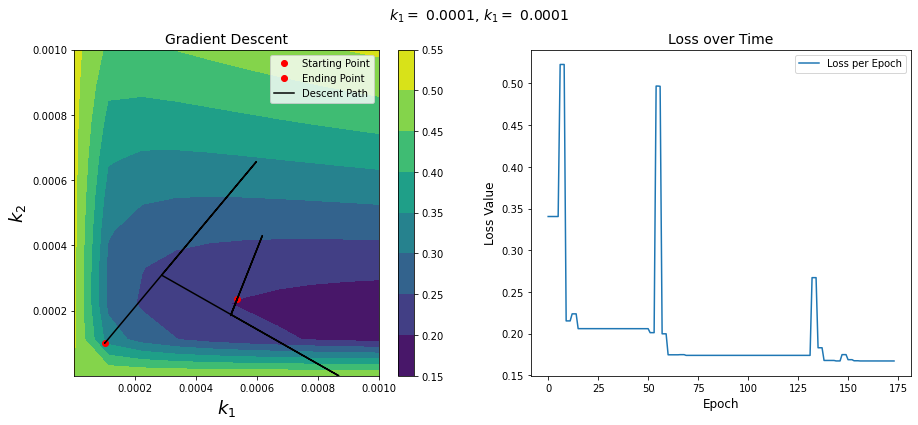

In [6]:
#Test optimization methods in 2D with sundials solvers
#Establish bounds on parameters
bounds = Bounds([1E-7, 1E-7], [0.001, 0.001])

#Perform constrained optimization
initial_params = [0.0001, 0.0001]

losses = []
k1_trace = []
k2_trace = []
start_time = time.time()
res = minimize(solve_point, initial_params, method='TNC', bounds=bounds, options={'gtol':1e-4, 'stepmx':1E-7})
elapsed_time = time.time() - start_time

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

endpoint = 'Gradient Descent'
ax = axs[0]
contour = ax.contourf(k1s_landscape,k2s_landscape,loss_landscape)
ax.plot(initial_params[0], initial_params[1], 'ro', label='Starting Point')
ax.plot(res.x[0], res.x[1], 'ro', label='Ending Point')
ax.plot(k1_trace, k2_trace, 'k-', label='Descent Path')
ax.legend()
ax.set_title(f'{endpoint}', fontsize=14)
ax.set_xlabel('$k_1$', fontsize=18)
ax.set_ylabel('$k_2$', fontsize=18)
fig.colorbar(contour, ax=ax)


endpoint = 'Loss over Time'
ax = axs[1]
ax.plot(losses, label='Loss per Epoch')
ax.legend()

ax.set_title(f'{endpoint}', fontsize=14)
ax.set_xlabel('Epoch', fontsize=12)
ax.set_ylabel('Loss Value', fontsize=12)


fig.suptitle(rf'$k_1 = $ {initial_params[0]}, $k_1 = $ {initial_params[1]}', fontsize=14)
# fig.savefig(str(initial_params)+'.png')


In [24]:
def solve_point(x):
    n1, n2, theta1, theta2, k1, k2 = x
    
    alpha1 = 1E-5
    alpha2 = 1E-2

    int_time = 5E4
    t = np.linspace(0, int_time, 100) 
    y0 = np.array([2290., 0., 0., 0., 0., 0.]) 

    def dual_control_sundials(t, y, ydot):
        kc=12.; km=10.; lam=1.93E-4; Vin=1.; e0=0.0467
        ydot[0] = Vin - lam*y[0] - e0*nonlinearity(y[0], kc, km) - lam*y[1]
        ydot[1] = y[2]*nonlinearity(y[0], kc, km) - y[3]*nonlinearity(y[1], kc, km) - lam*y[1]
        ydot[2] = repression(y[1], k1, theta1, n1) - lam*y[2]
        ydot[3] = activation(y[1], k2, theta2, n2) - lam*y[3]
        ydot[4] = (Vin -  y[3]*nonlinearity(y[1], kc, km))**2
        ydot[5] = repression(y[1], k1, theta1, n1) + activation(y[1], k2, theta2, n2)

    def loss_biological(j1, j2, alpha1, alpha2):
        """Computes scalarized loss including genetic constraint and product production"""
        loss = alpha1*j1 + alpha2*j2
        return j1, j2, loss
        
    solution = ode('cvode', dual_control_sundials, old_api=False).solve(t, y0)
    j1, j2 = solution.values.y[-1, -2:]
    j1, j2, loss = loss_biological(j1, j2, alpha1=alpha1, alpha2=alpha2)
    return loss

In [25]:
def solve_patch(init_k1, init_k2, patch_size, step_size):
    center_loss = solve_point([2, 2, 0.1, 0.1, init_k1, init_k2])
    #Solve surrounding patch
    thetas = np.linspace(0, 2*np.pi, patch_size)
    k1s = step_size*np.cos(thetas) + init_k1
    k2s = step_size*np.sin(thetas) + init_k2
    min_loss = center_loss
    for k1, k2 in zip(k1s, k2s):
        loss = solve_point([2, 2, 0.1, 0.1, k1, k2])
        if loss < min_loss:
            new_k1 = k1
            new_k2 = k2
            min_loss = loss
    return new_k1, new_k2, min_loss

In [150]:
def bounds_check(k1, k2):
    if k1 <= 1E-3 and k1 <= 1E-3 and k2 >= 1E-7 and k2 >= 1E-7:
        return True
    else: return False

Terminating due to hitting bounds


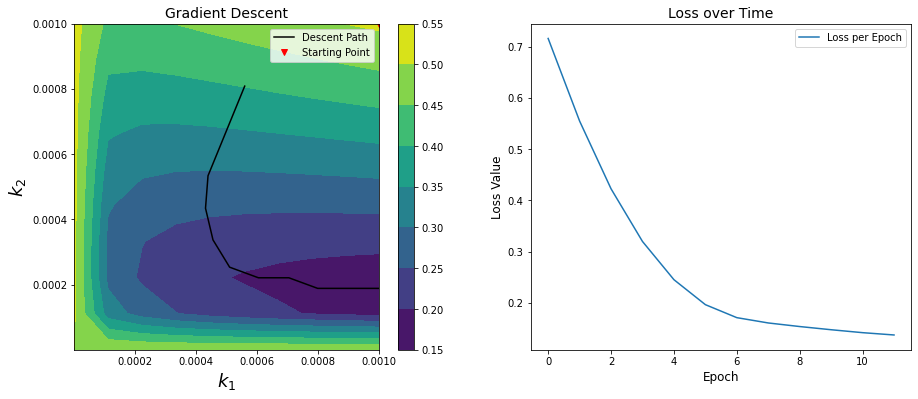

In [159]:
patch_size = 20
step_size = 0.0001
num_epochs = 20
tolerance = 0.0004
#Select random initialization and solve once
krange = [1E-7, 0.001]
# k1 = random.uniform(krange[0], krange[1])
# k2 = random.uniform(krange[0], krange[1])
#Set initialization for better viz
initial_params = [0.0006, 0.0009]


next_k1, next_k2, loss = solve_patch(initial_params[0], initial_params[1], patch_size, step_size)

losses = [loss]; k1_trace = [next_k1]; k2_trace = [next_k2]
for i in range(num_epochs):
    new_k1, new_k2, loss = solve_patch(next_k1, next_k2, patch_size, step_size)
    next_k1 = new_k1
    next_k2 = new_k2

    if bounds_check(next_k1, next_k2):
        losses.append(loss)
        k1_trace.append(new_k1)
        k2_trace.append(new_k2)

        if losses[-2] - losses[-1] < tolerance:
            print('Terminating early at step', i, 'of ', num_epochs)
            break
    else: 
        print('Terminating due to hitting bounds')
        break

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

endpoint = 'Gradient Descent'
ax = axs[0]
contour = ax.contourf(k1s_landscape,k2s_landscape,loss_landscape)
ax.plot(k1_trace, k2_trace, 'k-', label='Descent Path')
ax.plot(init_k1, init_k2, 'rv', label='Starting Point')
ax.legend()

ax.set_title(f'{endpoint}', fontsize=14)
ax.set_xlabel('$k_1$', fontsize=18)
ax.set_ylabel('$k_2$', fontsize=18)
fig.colorbar(contour, ax=ax)


endpoint = 'Loss over Time'
ax = axs[1]
ax.plot(losses, label='Loss per Epoch')
ax.legend()

ax.set_title(f'{endpoint}', fontsize=14)
ax.set_xlabel('Epoch', fontsize=12)
ax.set_ylabel('Loss Value', fontsize=12)
fig.savefig(str(initial_params)+'_sundials.png')

In [166]:
def solve_patch_6d(init_conds, patch_size, step_sizes):
    n1, n2, theta1, theta2, k1, k2 = init_conds
    center_loss = solve_point(init_conds)
    #Sample randomly from hypersphere
    normal_deviates = np.random.normal(size=(6, patch_size))
    radius = np.sqrt((normal_deviates**2).sum(axis=0))
    points = normal_deviates/radius

    scaled_points = []
    for i in range(patch_size):
        scaled_points.append(list(step_sizes*points[:, i]  + init_conds))
    scaled_points = np.array(scaled_points)
    
    min_loss = center_loss
    new_k1 = k1; new_k2 = k2; new_theta1 = theta1; new_theta2 = theta2; new_n1 = n1; new_n2 = n2
    for n1, n2, theta1, theta2, k1, k2 in zip(scaled_points[:, 0], scaled_points[:, 1], scaled_points[:, 2], scaled_points[:, 3], scaled_points[:, 4], scaled_points[:, 5]):
        loss = solve_point([n1, n2, theta1, theta2, k1, k2])
        if bounds_check_6d(n1, n2, theta1, theta2, k1, k2):
            if loss < min_loss:
                new_k1 = k1
                new_k2 = k2
                new_theta1 = theta1
                new_theta2 = theta2
                new_n1 = n1
                new_n2 = n2
                min_loss = loss
    return new_n1, new_n2, new_theta1, new_theta2, new_k1, new_k2, min_loss

In [167]:
def bounds_check_6d(n1, n2, theta1, theta2, k1, k2):
    if k1 <= 1E-3 and k2 <= 1E-3 and k1 >= 1E-7 and k2 >= 1E-7:
        if n1 <= 4 and n2 <= 4 and n1 >= 1 and n2 >= 1:
            if theta1 >= 0.001 and theta2 >= 0.001 and theta1 <= 100 and theta2 <= 100:
                return True
    else: return False

In [168]:
num_epochs = 100
tolerance = 0.0004

init_conds = np.array([2,2,0.1, 0.1, 0.001, 0.001])
patch_size = 100
step_sizes = np.array([0.1, 0.1, 0.01, 0.01, 0.0001, 0.0001])
solve_patch_6d(init_conds, patch_size, step_sizes)

next_n1, next_n2, next_theta1, next_theta2, next_k1, next_k2, loss = solve_patch_6d(init_conds, patch_size, step_sizes)

losses = [loss]; k1_trace = [next_k1]; k2_trace = [next_k2]; n1_trace = [next_n1]; n2_trace = [next_n2]; theta1_trace = [next_theta1]; theta2_trace = [next_theta2]

for i in range(num_epochs):
    new_n1, new_n2, new_theta1, new_theta2, new_k1, new_k2, loss = solve_patch_6d([next_n1, next_n2, next_theta1, next_theta2, next_k1, next_k2], patch_size, step_sizes)
    next_k1 = new_k1
    next_k2 = new_k2
    next_theta1 = new_theta1
    next_theta2 = new_theta2
    next_n1 = new_n1
    next_n2 = new_n2

    print('Epoch: ', i, 'Loss: ', loss)
    losses.append(loss)
    k1_trace.append(new_k1)
    k2_trace.append(new_k2)
    n1_trace.append(new_n1)
    n2_trace.append(new_n2)
    theta1_trace.append(new_theta1)
    theta2_trace.append(new_theta2)

    if losses[-2] - losses[-1] < tolerance:
        print('Terminating early at step', i, 'of ', num_epochs)
        break

Epoch:  0 Loss:  1.0292217455386452
Epoch:  1 Loss:  0.7936745726268022
Epoch:  2 Loss:  0.6213329679250525
Epoch:  3 Loss:  0.48230876204394557
Epoch:  4 Loss:  0.38311037627788164
Epoch:  5 Loss:  0.31886056258334794
Epoch:  6 Loss:  0.266547150811816
Epoch:  7 Loss:  0.23067528991496267
Epoch:  8 Loss:  0.2077358594266023
Epoch:  9 Loss:  0.18926850012644164
Epoch:  10 Loss:  0.17590681892682386
Epoch:  11 Loss:  0.159890382798388
Epoch:  12 Loss:  0.15077121668203639
Epoch:  13 Loss:  0.141378728958098
Epoch:  14 Loss:  0.13131605898239473
Epoch:  15 Loss:  0.12677880130580946
Epoch:  16 Loss:  0.11839055645221301
Epoch:  17 Loss:  0.10771083242961134
Epoch:  18 Loss:  0.09873150817951457
Epoch:  19 Loss:  0.09276284015753386
Epoch:  20 Loss:  0.08820971859193384
Epoch:  21 Loss:  0.08235926659990986
Epoch:  22 Loss:  0.07664584897380407
Epoch:  23 Loss:  0.07374315046714637
Epoch:  24 Loss:  0.06785214776977523
Epoch:  25 Loss:  0.06516585029284903
Epoch:  26 Loss:  0.058178676491

Initial parameter values:  2.0 2.0 0.1 0.1 0.001 0.001
Final parameter values:  1.12 2.0 0.14 0.118 0.001 0.0


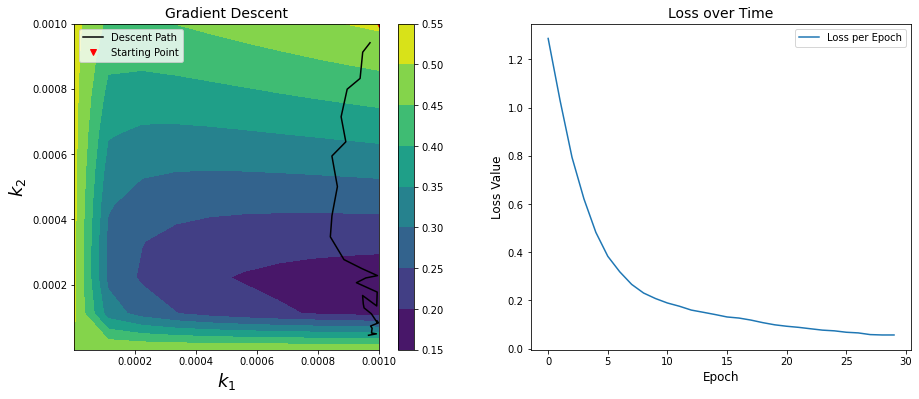

In [210]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

endpoint = 'Gradient Descent'
ax = axs[0]
contour = ax.contourf(k1s_landscape,k2s_landscape,loss_landscape)
ax.plot(k1_trace, k2_trace, 'k-', label='Descent Path')
ax.plot(init_k1, init_k2, 'rv', label='Starting Point')
ax.legend()

ax.set_title(f'{endpoint}', fontsize=14)
ax.set_xlabel('$k_1$', fontsize=18)
ax.set_ylabel('$k_2$', fontsize=18)
fig.colorbar(contour, ax=ax)


endpoint = 'Loss over Time'
ax = axs[1]
ax.plot(losses, label='Loss per Epoch')
ax.legend()

ax.set_title(f'{endpoint}', fontsize=14)
ax.set_xlabel('Epoch', fontsize=12)
ax.set_ylabel('Loss Value', fontsize=12)
#fig.savefig(str(initial_params)+'_sundials6d.png')
print('Initial parameter values: ',init_conds[0],init_conds[1],init_conds[2],init_conds[3],init_conds[4],init_conds[5])
print('Final parameter values: ',round(n1_trace[-1],2), round(n2_trace[-1],2), round(theta1_trace[-1],2), round(theta2_trace[-1],3), round(k1_trace[-1],3), round(k2_trace[-1],3))

In [190]:
true_landscape = pd.read_csv('../6d_loss_landscape/6d_landscape_sundials.csv')

def closest_value(input_list, input_value):
  arr = np.asarray(input_list)
  i = (np.abs(arr - input_value)).argmin()
  return arr[i]

closest_k1 = closest_value(list(true_landscape.k1.unique()), k1_trace[-1])
closest_k2 = closest_value(list(true_landscape.k2.unique()), k2_trace[-1])
closest_n1 = closest_value(list(true_landscape.n1.unique()), n1_trace[-1])
closest_n2 = closest_value(list(true_landscape.n2.unique()), n2_trace[-1])
closest_theta1 = closest_value(list(true_landscape.theta1.unique()), theta1_trace[-1])
closest_theta2 = closest_value(list(true_landscape.theta2.unique()), theta2_trace[-1])


In [197]:
theta_exploration = true_landscape.loc[true_landscape.k1 == closest_k1].loc[true_landscape.k2 == closest_k2].loc[true_landscape.n1 == closest_n1].loc[true_landscape.n2 == closest_n2]
k_exploration = true_landscape.loc[true_landscape.theta1 == closest_theta1].loc[true_landscape.theta2 == closest_theta2].loc[true_landscape.n1 == closest_n1].loc[true_landscape.n2 == closest_n2]
n_exploration = true_landscape.loc[true_landscape.k1 == closest_k1].loc[true_landscape.k2 == closest_k2].loc[true_landscape.theta1 == closest_theta1].loc[true_landscape.theta2 == closest_theta2]


In [1]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

endpoint = 'Theta Exploration'
ax = axs[0]
sns.scatterplot(x='theta1', y='theta2', data = theta_exploration, hue='loss', ax=ax)
ax.plot(theta1_trace, theta2_trace, 'r-')

ax.set_title(f'{endpoint}', fontsize=14)
ax.set_xlabel('$theta_1$', fontsize=18)
ax.set_ylabel('$theta_2$', fontsize=18)


endpoint = 'N Exploration'
ax = axs[1]
sns.scatterplot(x='n1', y='n2', data = n_exploration, hue='loss', ax=ax)

ax.set_title(f'{endpoint}', fontsize=14)
ax.set_xlabel('$n_1$', fontsize=18)
ax.set_ylabel('$n_2$', fontsize=18)
ax.plot(n1_trace, n2_trace, 'k-')

endpoint = 'K Exploration'
ax = axs[2]
sns.scatterplot(x='k1', y='k2', data = k_exploration, hue='loss', ax=ax)
ax.plot(k1_trace, k2_trace, 'k-')

ax.set_title(f'{endpoint}', fontsize=14)
ax.set_xlabel('$k_1$', fontsize=18)
ax.set_ylabel('$k_2$', fontsize=18)
#fig.savefig('close_area_with_trace.png')


NameError: name 'plt' is not defined

In [272]:
min_loss_landscape


,Unnamed: 0,n1,n2,theta1,theta2,k1,k2,elapsed_time,j1,j2,loss
103868,103868,4.0,1.0,5.0,10.0,0.001,0.00005,0.004660,1751.198713,2.328755,0.0408
104768,104768,4.0,1.0,5.0,10.0,0.001,0.00005,0.004609,1751.198713,2.328755,0.0408


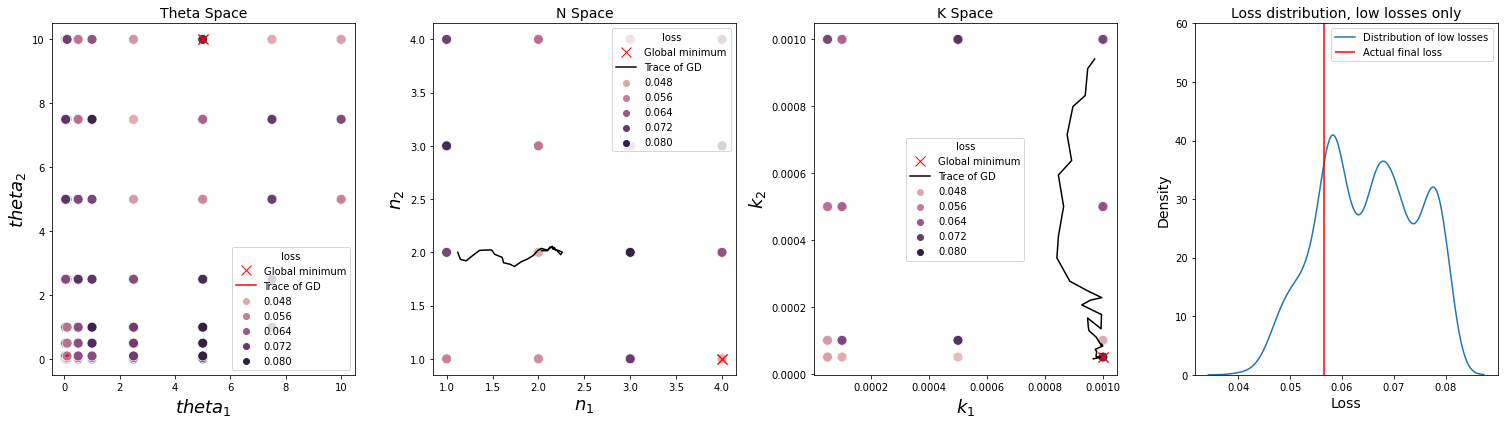

In [280]:
#Plot local minima of space
landscape = true_landscape.loc[true_landscape.theta1 != 100].loc[true_landscape.theta2 != 100]
min_loss = landscape.loss.min()
tolerance = 0.04

low_loss = landscape.loc[landscape.loss < min_loss + tolerance]
min_loss_landscape = landscape.loc[landscape.loss == min_loss]
fig, axs = plt.subplots(1, 4, figsize=(21, 6))

endpoint = 'Theta Space'
ax = axs[0]
ax.plot(min_loss_landscape.theta1, min_loss_landscape.theta2, 'rx', markersize=10, label='Global minimum')
ax.plot(theta1_trace, theta2_trace, 'r-', label='Trace of GD')
sns.scatterplot(x='theta1', y='theta2', data = low_loss, hue='loss', ax=ax, s=100)

ax.set_title(f'{endpoint}', fontsize=14)
ax.set_xlabel('$theta_1$', fontsize=18)
ax.set_ylabel('$theta_2$', fontsize=18)


endpoint = 'N Space'
ax = axs[1]
ax.plot(min_loss_landscape.n1, min_loss_landscape.n2, 'rx', markersize=10, label='Global minimum')
ax.plot(n1_trace, n2_trace, 'k-', label='Trace of GD')
sns.scatterplot(x='n1', y='n2', data = low_loss, hue='loss', ax=ax , s=100)

ax.set_title(f'{endpoint}', fontsize=14)
ax.set_xlabel('$n_1$', fontsize=18)
ax.set_ylabel('$n_2$', fontsize=18)

endpoint = 'K Space'
ax = axs[2]
ax.plot(min_loss_landscape.k1, min_loss_landscape.k2, 'rx', markersize=10, label='Global minimum')
ax.plot(k1_trace, k2_trace, 'k-', label='Trace of GD')

sns.scatterplot(x='k1', y='k2', data = low_loss, hue='loss', ax=ax, s=100)
ax.set_title(f'{endpoint}', fontsize=14)
ax.set_xlabel('$k_1$', fontsize=18)
ax.set_ylabel('$k_2$', fontsize=18)

endpoint = 'Loss distribution, low losses only'
ax = axs[3]
sns.kdeplot(low_loss.loss, ax=ax, label='Distribution of low losses')
ax.vlines(losses[-1], 0, 200, colors='r', label='Actual final loss')
ax.set_ylim([0, 60])
ax.set_title(f'{endpoint}', fontsize=14)
ax.set_xlabel('Loss', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
ax.legend()
fig.tight_layout()
fig.savefig('low_losses_exploration_with_trace.png')
